In [20]:
# NAIVE BAYES IMPELEMENTATION

# Importing dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [21]:
# Training and testing data preperation
trainingData = pd.read_csv("../Data/TrainingData.csv")
testingData = pd.read_csv("../Data/TestingData.csv")
targetsTrain = trainingData["home_team_result"]
featuresTrain = trainingData.drop(["home_team_result","winner_encoded"],axis=1)
featuresTest = testingData.drop("home_team_result",axis=1)
targetsTest = testingData["home_team_result"]


In [22]:
# Define model, train and test
model = GaussianNB()
#Training model
model.fit(featuresTrain,targetsTrain)
print("Training data: {} rows x {} columns ".format(trainingData.shape[0],trainingData.shape[1]))
print("Testing data: {} rows x {} columns".format(testingData.shape[0],testingData.shape[1]))
print("Accuracy of Naive Bayes using Sci-Kit: {}%".format(model.score(featuresTest,targetsTest)*100))

Training data: 48 rows x 22 columns 
Testing data: 16 rows x 21 columns
Accuracy of Naive Bayes using Sci-Kit: 43.75%


In [23]:
# Training and testing data preperation (With Large data)
trainingData = pd.read_csv("../Data/LargeTrainingData.csv")
testingData = pd.read_csv("../Data/LargeTestingData.csv")
targetsTrain = trainingData["home_team_result"]
featuresTrain = trainingData.drop(["home_team_result","winner_encoded"],axis=1)
featuresTest = testingData.drop("home_team_result",axis=1)
targetsTest = testingData["home_team_result"]

In [24]:
# Define model, train and test
model = GaussianNB()
#Training model
model.fit(featuresTrain,targetsTrain)
print("Training data: {} rows x {} columns ".format(trainingData.shape[0],trainingData.shape[1]))
print("Testing data: {} rows x {} columns".format(testingData.shape[0],testingData.shape[1]))
print("Accuracy of Naive Bayes using Sci-Kit: {}%".format(model.score(featuresTest,targetsTest)*100))

Training data: 176 rows x 22 columns 
Testing data: 16 rows x 21 columns
Accuracy of Naive Bayes using Sci-Kit: 43.75%


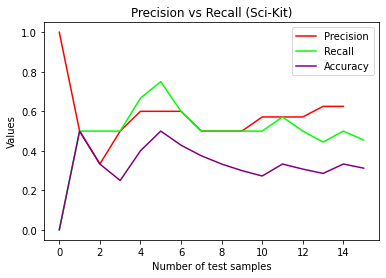

In [25]:
# Precision and Recall
def precisionAndRecall(predictedValues):
    actualValues = [1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1]
    truePositives = 0
    trueNegatives = 0
    falsePositives = 0
    falseNegatives = 0
    precision = []
    recall = []
    accuracy = []

    for index in range(len(predictedValues)):
        if(predictedValues[index]==1 and actualValues[index]==1):
            truePositives += 1
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append(truePositives/(truePositives+trueNegatives+falseNegatives+falsePositives))
        
        if(predictedValues[index]==1 and actualValues[index]==0):
            falsePositives += 1
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append(truePositives/(truePositives+trueNegatives+falseNegatives+falsePositives))
        
        if(predictedValues[index]==0 and actualValues[index]==0):
            trueNegatives += 1
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append(truePositives/(truePositives+trueNegatives+falseNegatives+falsePositives))

        if(predictedValues[index]==0 and actualValues[index]==1):
            falseNegatives += 1
            if(truePositives+falseNegatives!=0):
                calculatedRecall = truePositives/(truePositives+falseNegatives)
                recall.append(calculatedRecall)
            if(truePositives+falsePositives!=0):
                calculatedPrecision = truePositives/(truePositives+falsePositives)
                precision.append(calculatedPrecision)
            if(truePositives+trueNegatives+falseNegatives+falsePositives!=0):
                accuracy.append(truePositives/(truePositives+trueNegatives+falseNegatives+falsePositives))

    return precision,recall,accuracy

precision, recall,accuracy = precisionAndRecall(model.predict(featuresTest))

plt.title("Precision vs Recall (Sci-Kit)")
plt.xlabel("Number of test samples")
plt.ylabel("Values")
plt.plot(precision,color = "red", label = "Precision")
plt.plot(recall,color = "lime", label = "Recall")
plt.plot(accuracy,color = "purple", label = "Accuracy")

plt.legend()
plt.show()